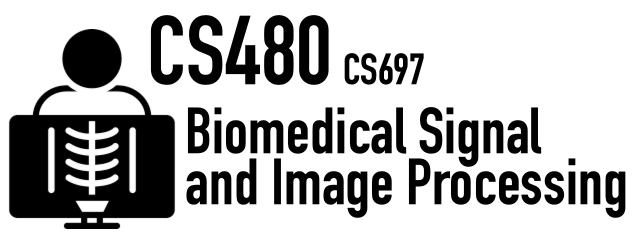
#Assignment 5

In [1]:
# In this assignment, we will visualize and explore a CT scan!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using pydicom, so lets install it!
!pip install pydicom

Defaulting to user installation because normal site-packages is not writeable


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [4]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [5]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [6]:
# There are 220 slices in the data

In [7]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [8]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

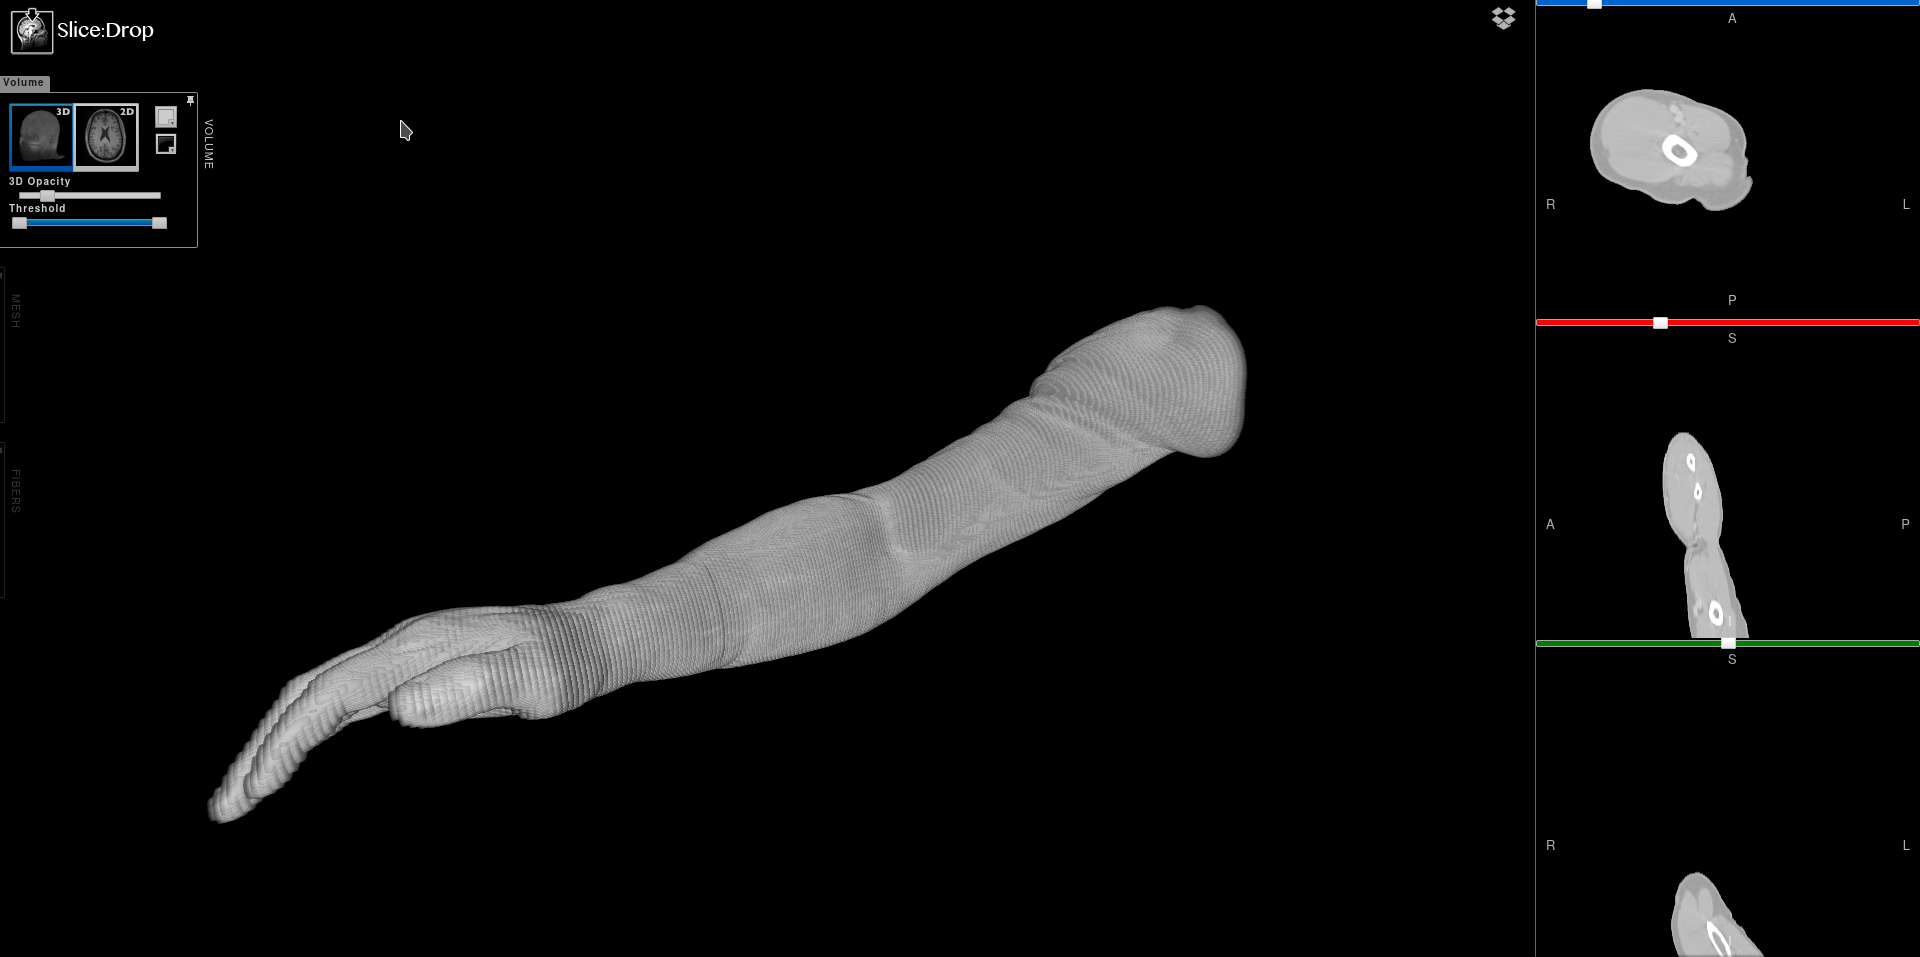

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [9]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [10]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [11]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [12]:
from pydicom import dcmread

In [32]:
import os

files = os.listdir('ct')
files.sort()

first = dcmread('ct/' + files[0])
data = np.empty((len(files), first.Rows, first.Columns), dtype='uint16')

data[0] = first.pixel_array
for i, file in enumerate(files[1:]):
    data[i+1] = dcmread('ct/' + file).pixel_array

In [14]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [15]:
# setup aspect ratios
ax_space = float(first.SliceThickness)
cor_space, sag_space = map(float, first.PixelSpacing)

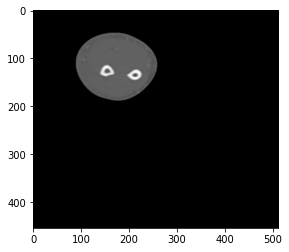

In [16]:
# TODO: YOUR CODE FOR AXIAL
ax = 100
plot = plt.imshow(data[ax, :, :], cmap='gray')
plt.gca().set_aspect(cor_space / sag_space)

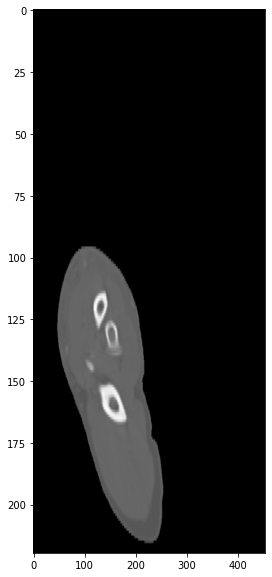

In [17]:
# TODO: YOUR CODE FOR SAGITTAL
sag = 100

plt.figure(figsize=(5, 10))
plt.imshow(data[:, :, sag], cmap='gray')

plt.gca().set_aspect(ax_space / cor_space)

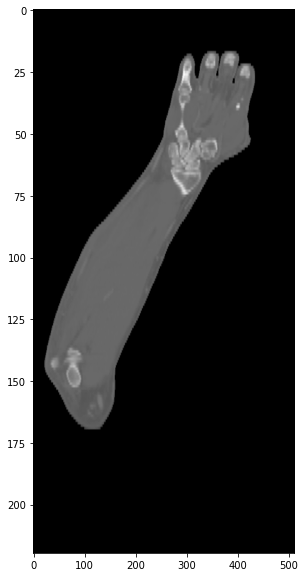

In [18]:
# TODO: YOUR CODE FOR CORONAL
cor = 100

plt.figure(figsize=(5, 10))
plot = plt.imshow(data[:, cor, :], cmap='gray')
plt.gca().set_aspect(ax_space / sag_space)

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [19]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [20]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

vmin=-175.0
vmax=235.0


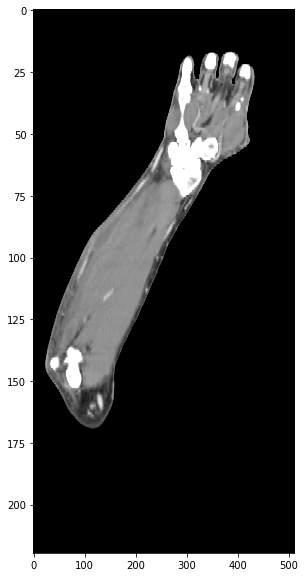

In [90]:
level = float(first[0x0028, 0x1050].value)
window = float(first[0x0028, 0x1051].value)
rescale = float(first[0x0028, 0x1052].value)

def window_level(window, level):
    vmin = level - window/2
    vmax = level + window/2

    print(f"{vmin=}\n{vmax=}")
    
    plt.figure(figsize=(5, 10))

    plt.imshow(data[:, 100] + rescale, cmap='gray', vmin=vmin, vmax=vmax)
    plt.gca().set_aspect(ax_space / sag_space)
    
window_level(window, level)

In [56]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

vmin=200.0
vmax=800.0


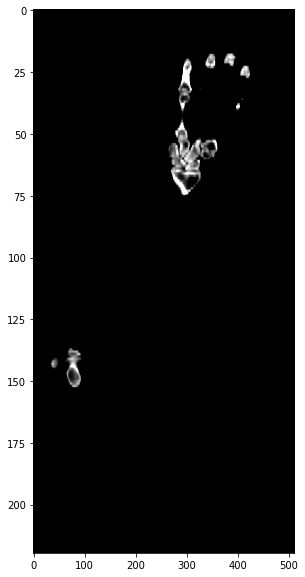

In [91]:
# bones
window_level(600, 500)

vmin=50.0
vmax=70.0


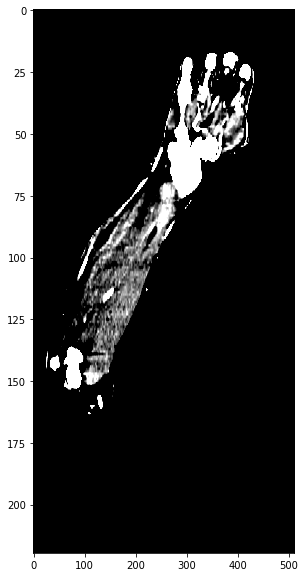

In [97]:
# soft tissue
window_level(20, 60)

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
# High values (around 200-1000) show denser tissues like bone, while lower values (around -100-+100) are good for showing soft tissue

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT

In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""